In [120]:
import pandas as pd

In [121]:
data = pd.read_csv(r"/Users/sreejagouni/Downloads/diabetes.csv")

In [122]:
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [146]:
print(data.shape)

(768, 9)


a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.

In [148]:
#setting a seed to ensure work reproducibility
import numpy as np

In [149]:
np.random.seed(42)
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [150]:
# Choosing random sample of 25 observations 
sample_data = data.sample(n=25)

In [151]:
print(sample_data.shape)

(25, 9)


In [152]:
# Calculate the mean glucose level in the sample
mean_glucose = sample_data['Glucose'].mean()

# Calculate the highest glucose level in the sample
highest_glucose = sample_data['Glucose'].max()

In [153]:
# Calculate the population mean glucose level
population_mean_glucose = data['Glucose'].mean()

# Calculate the highest glucose level in the population
populaton_highest_glucose = data['Glucose'].max()

In [154]:
# Display the sample glucose statistics
print("Sample mean Glucose Level:", mean_glucose)
print("Sample highest Glucose Level:", highest_glucose)

# Display the population glucose statistics
print("Population mean Glucose Level:", population_mean_glucose)
print("Population highest Glucose Level:", populaton_highest_glucose)

Sample mean Glucose Level: 116.64
Sample highest Glucose Level: 183
Population mean Glucose Level: 120.89453125
Population highest Glucose Level: 199


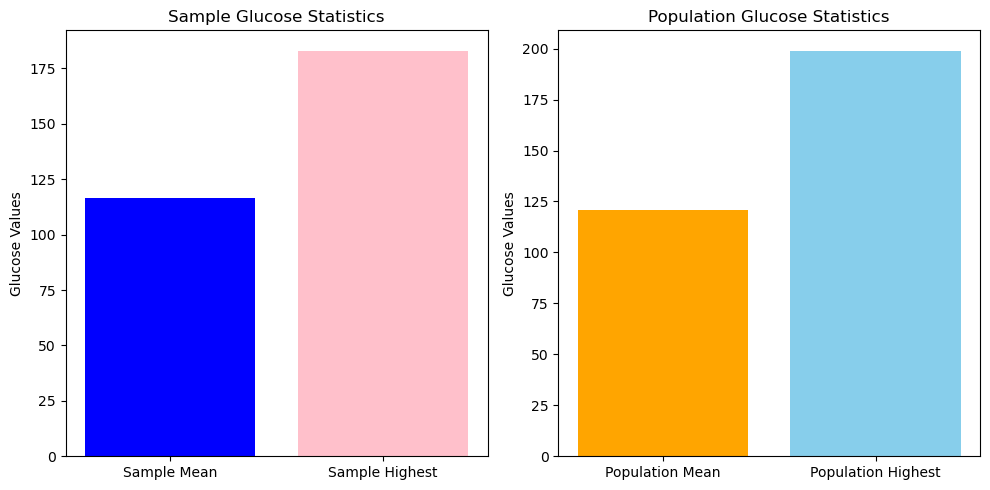

In [155]:
import matplotlib.pyplot as plt

# Data for the sample glucose statistics bar chart
sample_labels = ['Sample Mean', 'Sample Highest']
sample_values = [mean_glucose, highest_glucose]

# Data for the population glucose statistics bar chart
pop_labels = ['Population Mean', 'Population Highest']
pop_values = [population_mean_glucose, populaton_highest_glucose]

# Plotting the sample glucose statistics bar chart
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(sample_labels, sample_values, color=['blue', 'pink'])
plt.title('Sample Glucose Statistics')
plt.ylabel('Glucose Values')

# Plotting the population glucose statistics bar chart
plt.subplot(1, 2, 2)
plt.bar(pop_labels, pop_values, color=['orange', 'skyblue'])
plt.title('Population Glucose Statistics')
plt.ylabel('Glucose Values')

# Show the charts side by side for comparison
plt.tight_layout()
plt.show()

b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.

<Figure size 1400x600 with 0 Axes>

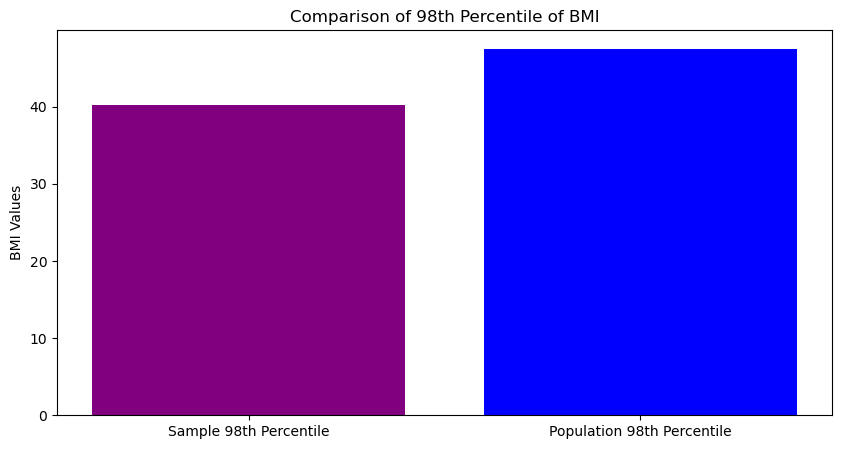

In [156]:
# Calculate the 98th percentile of BMI for the sample
sample_98th_percentile_bmi = np.percentile(sample_data['BMI'], 98)

# Calculate the 98th percentile of BMI for the population
pop_98th_percentile_bmi = np.percentile(data['BMI'], 98)

# Plotting the glucose statistics
plt.figure(figsize=(14, 6))
# Plotting the BMI percentiles
plt.figure(figsize=(10, 5))

# Data for BMI percentile comparison
bmi_labels = ['Sample 98th Percentile', 'Population 98th Percentile']
bmi_values = [sample_98th_percentile_bmi, pop_98th_percentile_bmi]

# Plotting the BMI percentile bar chart
plt.bar(bmi_labels, bmi_values, color=['purple', 'blue'])
plt.title('Comparison of 98th Percentile of BMI')
plt.ylabel('BMI Values')

plt.show()

c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison

In [157]:
sample = 500
sample_size = 150

In [158]:
# Create empty arrays to hold bootstrap data
bs_mean = np.zeros(sample)
bs_std = np.zeros(sample)
bs_percentile = np.zeros(sample)

# Carry out bootstrap sampling
for i in range(sample):
    # Create a bootstrap sample by sampling with replacement
    bs_sample = np.random.choice(data['BloodPressure'], size=sample_size, replace=True)

    # Calculate the bootstrap sample's mean, standard deviation, and 92nd percentile
    bs_mean[i] = np.mean(bs_sample)
    bs_std[i] = np.std(bs_sample)
    bs_percentile[i] = np.percentile(bs_sample, 92)


In [159]:
# Compute BloodPressure population statistics
pop_mean_bp = data['BloodPressure'].mean()
pop_std_bp = data['BloodPressure'].std()
pop_92th_percentile_bp = np.percentile(data['BloodPressure'], 92)

# Show the population data
print("Population Mean BloodPressure:", pop_mean_bp)
print("Population Standard Deviation BloodPressure:", pop_std_bp)
print("Population 92nd Percentile BloodPressure:", pop_92th_percentile_bp)

Population Mean BloodPressure: 69.10546875
Population Standard Deviation BloodPressure: 19.355807170644777
Population 92nd Percentile BloodPressure: 88.0


In [160]:
# Determine the mean of the bootstrap statistics
bs_mean_avg = np.mean(bs_mean)
bs_std = np.mean(bs_std)
bs_mean_percentile_92 = np.mean(bs_percentile)

# Present the statistics from the bootstrap
print("\nBs Mean BloodPressure:", bs_mean_avg)
print("Bs Standard Deviation BloodPressure:", bs_std)
print("Bs 92nd Percentile BloodPressure:", bs_mean_percentile_92)


Bs Mean BloodPressure: 69.17696
Bs Standard Deviation BloodPressure: 19.01902467947537
Bs 92nd Percentile BloodPressure: 88.51728000000001


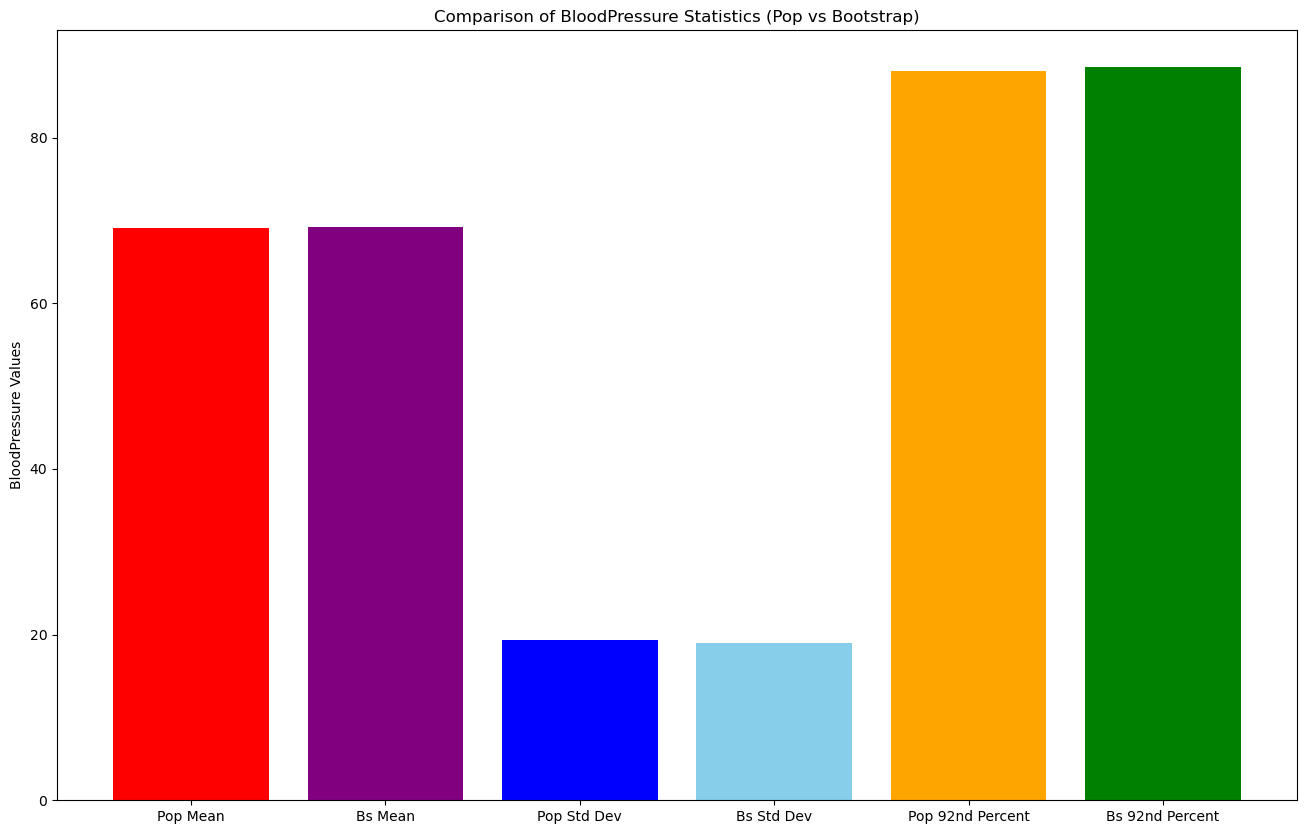

In [161]:
# Create a column chart for comparison
plt.figure(figsize=(16, 10))
labels = ['Pop Mean', 'Bs Mean', 'Pop Std Dev', 'Bs Std Dev', 'Pop 92nd Percent', 'Bs 92nd Percent']
values = [pop_mean_bp, bs_mean_avg, pop_std_bp, bs_std, pop_92th_percentile_bp, bs_mean_percentile_92]

plt.bar(labels, values, color=['Red', 'purple', 'blue', 'skyblue', 'orange', 'green'])
plt.title('Comparison of BloodPressure Statistics (Pop vs Bootstrap)')
plt.ylabel('BloodPressure Values')
plt.show()